<a href="https://colab.research.google.com/github/ohallao/MoneyBall-Brasileirao/blob/main/MoneyBall_Braisleirao_Meias_Ofensivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!apt-get install -y chromium-chromedriver

In [2]:
#!pip install soccerdata

In [3]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[11/28/24 03:12:25] INFO     No custom team name replacements found. You can configure these in       ]8;id=72325;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=261364;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#90\90]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=103181;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=617866;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#194\194]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [4]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [5]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[11/28/24 03:12:26] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=593390;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=862634;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [6]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK) e Zagueiros (DF)

#2- Selecionar as colunas

In [7]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-058   
                                  Alex Santana        BRA  MF,FW  29-199   
                                  Bento               BRA     GK  25-171   
                                  Bruno Praxedes      BRA  MF,FW  22-294   
                                  Bruno Zapelli       ARG  MF,FW  22-195   

                                                    born Playing Time         \
                                                                   MP Starts   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998           17     13   
                                  Alex Santana      1995            4      0   
                                  Bento             1999            7      7   
                                  Bruno Praxedes    2002            7      2   
                                  Bruno Zapelli     2002           31     16   

                                                               Performance  \
                                                     Min   90s         Gls   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1065  11.8           4   
                                  Alex Santana       101   1.1           0   
                                  Bento              630   7.0           0   
                                  Bruno Praxedes     237   2.6           0   
                                  Bruno Zapelli     1384  15.4           0   

                                                        ... Per 90 Minutes  \
                                                   Ast  ...            Gls   
league      season team           player                ...                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   1  ...           0.34   
                                  Alex Santana       0  ...            0.0   
                                  Bento              0  ...            0.0   
                                  Bruno Praxedes     0  ...            0.0   
                                  Bruno Zapelli      4  ...            0.0   

                                                                             \
                                                     Ast   G+A  G-PK G+A-PK   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.08  0.42  0.34   0.42   
                                  Alex Santana       0.0   0.0   0.0    0.0   
                                  Bento              0.0   0.0   0.0    0.0   
                                  Bruno Praxedes     0.0   0.0   0.0    0.0   
                                  Bruno Zapelli     0.26  0.26   0.0   0.26   

                                                                             \
                                                      xG   xAG xG+xAG  npxG   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.27  0.19   0.45  0.27   
                                  Alex Santana      0.06   0.0   0.06  0.06   
                                  Bento              0.0   0.0    0.0   0.0   
                                  Bruno Praxedes    0.03  0.12   0.15  0.03   
                                  Bruno Zapelli     0.24  0.27   0.51  0.24   

                                                             
                                                   npxG+xAG  
league      season team           player                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     0.45  
                                  Ale

In [8]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season            team            player nation    pos     age  \
                                                                                
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  26-058   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  29-199   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  25-171   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  22-294   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  22-195   

   born Playing Time         ... Per 90 Minutes                           \
                  MP Starts  ...            Gls   Ast   G+A  G-PK G+A-PK   
0  1998           17     13  ...           0.34  0.08  0.42  0.34   0.42   
1  1995            4      0  ...            0.0   0.0   0.0   0.0    0.0   
2  1999            7      7  ...            0.0   0.0   0.0   0.0    0.0   
3  2002            7      2  ...            0.0   0.0   0.0   0.0    0.0   
4  2002           31     16  ...            0.0  0.26  0.26   0.0   0.26   

                                     
     xG   xAG xG+xAG  npxG npxG+xAG  
0  0.27  0.19   0.45  0.27     0.45  
1  0.06   0.0   0.06  0.06     0.06  
2   0.0   0.0    0.0   0.0      0.0  
3  0.03  0.12   0.15  0.03     0.15  
4  0.24  0.27   0.51  0.24     0.51  

[5 rows x 37 columns]

In [9]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-058   
                                  Alex Santana        BRA  MF,FW  29-199   
                                  Bento               BRA     GK  25-171   
                                  Bruno Praxedes      BRA  MF,FW  22-294   
                                  Bruno Zapelli       ARG  MF,FW  22-195   

                                                    born   90s Performance  \
                                                                      CrdY   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998  11.8           5   
                                  Alex Santana      1995   1.1           2   
                                  Bento             1999   7.0           1   
                                  Bruno Praxedes    2002   2.6           0   
                                  Bruno Zapelli     2002  15.4           3   

                                                                       ...  \
                                                   CrdR 2CrdY Fls Fld  ...   
league      season team           player                               ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    1     1  14  24  ...   
                                  Alex Santana        0     0   3   1  ...   
                                  Bento               0     0   1   0  ...   
                                  Bruno Praxedes      0     0   8   2  ...   
                                  Bruno Zapelli       0     0  19  18  ...   

                                                                             \
                                                   Crs Int TklW PKwon PKcon   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  29   4   16     0     0   
                                  Alex Santana       0   0    0     0     0   
                                  Bento              0   0    0     0     1   
                                  Bruno Praxedes     7   2    4     0     0   
                                  Bruno Zapelli     91   8   19     0     0   

                                                            Aerial Duels       \
                                                   OG Recov          Won Lost   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0    61            6    7   
                                  Alex Santana      0     6            2    4   
                                  Bento             0     4            2    0   
                                  Bruno Praxedes    0    13            3    2   
                                  Bruno Zapelli     0    70            4   17   

                                                           
                                                     Won%  
league      season team           player                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   46.2  
                                  Alex Santana       33.3  
                                  Bento             100.0  
                                  Bruno Praxedes     60.0  
                                  Bruno Zapelli      19.0  

[5 rows x 21 columns]

In [10]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season            team            player nation    pos     age  \
                                                                                
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  26-058   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  29-199   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  25-171   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  22-294   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  22-195   

   born   90s Performance  ...                                   Aerial Duels  \
                     CrdY  ... Crs Int TklW PKwon PKcon OG Recov          Won   
0  1998  11.8           5  ...  29   4   16     0     0  0    61            6   
1  1995   1.1           2  ...   0   0    0     0     0  0     6            2   
2  1999   7.0           1  ...   0   0    0     0     1  0     4            2   
3  2002   2.6           0  ...   7   2    4     0     0  0    13            3   
4  2002  15.4           3  ...  91   8   19     0     0  0    70            4   

               
  Lost   Won%  
0    7   46.2  
1    4   33.3  
2    0  100.0  
3    2   60.0  
4   17   19.0  

[5 rows x 25 columns]

In [11]:
player_season_passing = fbref.read_player_season_stats(stat_type="passing")
player_season_passing.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-058   
                                  Alex Santana        BRA  MF,FW  29-199   
                                  Bento               BRA     GK  25-171   
                                  Bruno Praxedes      BRA  MF,FW  22-294   
                                  Bruno Zapelli       ARG  MF,FW  22-195   

                                                    born   90s Total       \
                                                                 Cmp  Att   
league      season team           player                                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998  11.8   288  377   
                                  Alex Santana      1995   1.1    45   50   
                                  Bento             1999   7.0   121  171   
                                  Bruno Praxedes    2002   2.6    70  100   
                                  Bruno Zapelli     2002  15.4   527  722   

                                                                          ...  \
                                                    Cmp% TotDist PrgDist  ...   
league      season team           player                                  ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  76.4    4172    1174  ...   
                                  Alex Santana      90.0     619     131  ...   
                                  Bento             70.8    4251    3329  ...   
                                  Bruno Praxedes    70.0    1177     365  ...   
                                  Bruno Zapelli     73.0    8429    2300  ...   

                                                    Long Ast  xAG Expected  \
                                                    Cmp%                xA   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  41.4   1  2.2      1.6   
                                  Alex Santana       0.0   0  0.0      0.1   
                                  Bento             56.4   0  0.0      0.0   
                                  Bruno Praxedes    66.7   0  0.3      0.4   
                                  Bruno Zapelli     49.1   4  4.1      4.0   

                                                          KP 1/3 PPA CrsPA  \
                                                   A-xAG                     
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  -1.2  20  27  21     4   
                                  Alex Santana       0.0   0   2   0     0   
                                  Bento              0.0   0   4   0     0   
                                  Bruno Praxedes    -0.3   4  11   1     0   
                                  Bruno Zapelli     -0.1  45  48  29     7   

                                                   PrgP  
                                                         
league      season team           player                 
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   52  
                                  Alex Santana        2  
                                  Bento               0  
                                  Bruno Praxedes     12  
                                  Bruno Zapelli      77  

[5 rows x 28 columns]

In [12]:
player_season_passing = player_season_passing.reset_index()
print(player_season_passing.columns)
player_season_passing.head()

MultiIndex([(  'league',        ''),
            (  'season',        ''),
            (    'team',        ''),
            (  'player',        ''),
            (  'nation',        ''),
            (     'pos',        ''),
            (     'age',        ''),
            (    'born',        ''),
            (     '90s',        ''),
            (   'Total',     'Cmp'),
            (   'Total',     'Att'),
            (   'Total',    'Cmp%'),
            (   'Total', 'TotDist'),
            (   'Total', 'PrgDist'),
            (   'Short',     'Cmp'),
            (   'Short',     'Att'),
            (   'Short',    'Cmp%'),
            (  'Medium',     'Cmp'),
            (  'Medium',     'Att'),
            (  'Medium',    'Cmp%'),
            (    'Long',     'Cmp'),
            (    'Long',     'Att'),
            (    'Long',    'Cmp%'),
            (     'Ast',        ''),
            (     'xAG',        ''),
            ('Expected',      'xA'),
            ('Expected',   'A-xAG'),
 

league season            team            player nation    pos     age  \
                                                                                
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  26-058   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  29-199   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  25-171   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  22-294   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  22-195   

   born   90s Total  ...  Long Ast  xAG Expected        KP 1/3 PPA CrsPA PrgP  
                Cmp  ...  Cmp%                xA A-xAG                         
0  1998  11.8   288  ...  41.4   1  2.2      1.6  -1.2  20  27  21     4   52  
1  1995   1.1    45  ...   0.0   0  0.0      0.1   0.0   0   2   0     0    2  
2  1999   7.0   121  ...  56.4   0  0.0      0.0   0.0   0   4   0     0    0  
3  2002   2.6    70  ...  66.7   0  0.3      0.4  -0.3   4  11   1     0   12  
4  2002  15.4   527  ...  49.1   4  4.1      4.0  -0.1  45  48  29     7   77  

[5 rows x 32 columns]

In [13]:
player_season_possession = fbref.read_player_season_stats(stat_type="possession")
player_season_possession.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-058   
                                  Alex Santana        BRA  MF,FW  29-199   
                                  Bento               BRA     GK  25-171   
                                  Bruno Praxedes      BRA  MF,FW  22-294   
                                  Bruno Zapelli       ARG  MF,FW  22-195   

                                                    born   90s Touches  \
                                                               Touches   
league      season team           player                                 
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998  11.8     543   
                                  Alex Santana      1995   1.1      59   
                                  Bento             1999   7.0     184   
                                  Bruno Praxedes    2002   2.6     130   
                                  Bruno Zapelli     2002  15.4     907   

                                                                            \
                                                   Def Pen Def 3rd Mid 3rd   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio       4      52     214   
                                  Alex Santana           0       4      31   
                                  Bento                156     183       1   
                                  Bruno Praxedes         4      24      57   
                                  Bruno Zapelli         11      89     406   

                                                            ... Carries  \
                                                   Att 3rd  ... Carries   
league      season team           player                    ...           
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     288  ...     360   
                                  Alex Santana          24  ...      35   
                                  Bento                  0  ...      97   
                                  Bruno Praxedes        52  ...      58   
                                  Bruno Zapelli        426  ...     531   

                                                                             \
                                                   TotDist PrgDist PrgC 1/3   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    2267    1087   43  30   
                                  Alex Santana         205      98    1   4   
                                  Bento                508     285    0   0   
                                  Bruno Praxedes       436     204    5   3   
                                  Bruno Zapelli       2702    1185   37  24   

                                                               Receiving       
                                                   CPA Mis Dis       Rec PrgR  
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   8  33  23       374  121  
                                  Alex Santana       1   0   0        39    1  
                                  Bento              0   0   0        76    0  
                                  Bruno Praxedes     0   1   2        75   13  
                                  Bruno Zapelli      8  32  35       633  114  

[5 rows x 27 columns]

In [14]:
player_season_possession = player_season_possession.reset_index()
print(player_season_possession.columns)
player_season_possession.head()

MultiIndex([(   'league',        ''),
            (   'season',        ''),
            (     'team',        ''),
            (   'player',        ''),
            (   'nation',        ''),
            (      'pos',        ''),
            (      'age',        ''),
            (     'born',        ''),
            (      '90s',        ''),
            (  'Touches', 'Touches'),
            (  'Touches', 'Def Pen'),
            (  'Touches', 'Def 3rd'),
            (  'Touches', 'Mid 3rd'),
            (  'Touches', 'Att 3rd'),
            (  'Touches', 'Att Pen'),
            (  'Touches',    'Live'),
            ( 'Take-Ons',     'Att'),
            ( 'Take-Ons',    'Succ'),
            ( 'Take-Ons',   'Succ%'),
            ( 'Take-Ons',    'Tkld'),
            ( 'Take-Ons',   'Tkld%'),
            (  'Carries', 'Carries'),
            (  'Carries', 'TotDist'),
            (  'Carries', 'PrgDist'),
            (  'Carries',    'PrgC'),
            (  'Carries',     '1/3'),
            

league season            team            player nation    pos     age  \
                                                                                
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  26-058   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  29-199   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  25-171   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  22-294   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  22-195   

   born   90s Touches  ... Carries                                       \
              Touches  ... Carries TotDist PrgDist PrgC 1/3 CPA Mis Dis   
0  1998  11.8     543  ...     360    2267    1087   43  30   8  33  23   
1  1995   1.1      59  ...      35     205      98    1   4   1   0   0   
2  1999   7.0     184  ...      97     508     285    0   0   0   0   0   
3  2002   2.6     130  ...      58     436     204    5   3   0   1   2   
4  2002  15.4     907  ...     531    2702    1185   37  24   8  32  35   

  Receiving       
        Rec PrgR  
0       374  121  
1        39    1  
2        76    0  
3        75   13  
4       633  114  

[5 rows x 31 columns]

In [15]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(filter(None, col)).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(filter(None, col)).strip() for col in player_season_misc.columns]
player_season_possession.columns = ['_'.join(filter(None, col)).strip() for col in player_season_possession.columns]
player_season_passing.columns = ['_'.join(filter(None, col)).strip() for col in player_season_passing.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_possession.columns)
print(player_season_passing.columns)

Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born',
       'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born',
       '90s', 'Performance_CrdY', 'Performance_CrdR', 'Performance_2CrdY',
       'Performance_Fls', 'Performance_Fld', 'Performance_Off',
       'Perform

In [20]:
# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player', 'team','age','pos','Playing Time_Min', 'Progression_PrgR', 'Expected_xG', 'Expected_xAG', 'Performance_G-PK', 'Performance_Ast', 'Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player', 'team', 'Performance_Crs']
]
df_passing_selected = player_season_passing[
    ['player', 'team','1/3','KP']
]
df_possession_selected = player_season_possession[
    ['player', 'team', 'Take-Ons_Att','Take-Ons_Succ',]
]
# 4. Realizar o merge dos DataFrames com base nas colunas 'player' e 'team'
df_merged = pd.merge(df_std_selected, df_misc_selected, on=['player', 'team'], how='inner')
df_merged = pd.merge(df_merged, df_possession_selected, on=['player', 'team'], how='inner')
df_merged = pd.merge(df_merged, df_passing_selected, on=['player', 'team'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

             player            team     age    pos  Playing Time_Min  \
0  Agustín Canobbio  Ath Paranaense  26-058  FW,MF              1065   
1      Alex Santana  Ath Paranaense  29-199  MF,FW               101   
2             Bento  Ath Paranaense  25-171     GK               630   
3    Bruno Praxedes  Ath Paranaense  22-294  MF,FW               237   
4     Bruno Zapelli  Ath Paranaense  22-195  MF,FW              1384   

   Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
0               121          3.1           2.2                 4   
1                 1          0.1           0.0                 0   
2                 0          0.0           0.0                 0   
3                13          0.1           0.3                 0   
4               114          3.7           4.1                 0   

   Performance_Ast  Progression_PrgC  Progression_PrgP  Performance_Crs  \
0                1                43                52               29   
1       

In [22]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK) e zagueiros (DF)
filtered_data = filtered_data[
    ~filtered_data[('pos')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())

             player            team     age    pos  Playing Time_Min  \
0  Agustín Canobbio  Ath Paranaense  26-058  FW,MF              1065   
4     Bruno Zapelli  Ath Paranaense  22-195  MF,FW              1384   
5         Christian  Ath Paranaense  23-345  MF,FW              1366   
7             Erick  Ath Paranaense  27-014     MF              2373   
8       Fernandinho  Ath Paranaense  39-208     MF              1430   

   Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
0               121          3.1           2.2                 4   
4               114          3.7           4.1                 0   
5                96          1.5           1.8                 1   
7                39          3.5           1.4                 2   
8                36          1.6           2.4                 1   

   Performance_Ast  Progression_PrgC  Progression_PrgP  Performance_Crs  \
0                1                43                52               29   
4       

In [26]:
# Selecionar as colunas desejadas para análise
meia_ofensivo = filtered_data[[
    ('player'),
    ('team'),
    ('pos'),
    ('Playing Time_Min'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('KP'),
    ('1/3'),
    ('Performance_Crs'),
    ('Take-Ons_Att'),
    ('Take-Ons_Succ')
]]

# Renomear as colunas para facilitar o uso
meia_ofensivo.columns = ['jogador','time','posicao', 'Minutos','xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(meia_ofensivo.head())


# Criar a nova coluna 'Dribles' no formato "50% (5/10)"
meia_ofensivo['%Dribles'] = (
    (meia_ofensivo['Dribles_certos'] / meia_ofensivo['Dribles_Tentados'] * 100).round(1).astype(str) + '% (' +
    meia_ofensivo['Dribles_certos'].astype(str) + '/' +
    meia_ofensivo['Dribles_Tentados'].astype(str) + ')'
)

# Criar uma nova coluna 'Acoes_Ofensivas' somando 'PrgC' e 'PrgP'
meia_ofensivo['Acoes Ofensivas'] = meia_ofensivo['PrgC'] + meia_ofensivo['PrgP']

# Remover jogadores com todas as métricas iguais a 0
meia_ofensivo = meia_ofensivo[(meia_ofensivo[['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP']] != 0).any(axis=1)]

# Exibir as primeiras linhas para conferir
print(meia_ofensivo)

            jogador            time posicao  Minutos  PrgR   xG  xAG  G-PK  \
0  Agustín Canobbio  Ath Paranaense   FW,MF     1065   121  3.1  2.2     4   
4     Bruno Zapelli  Ath Paranaense   MF,FW     1384   114  3.7  4.1     0   
5         Christian  Ath Paranaense   MF,FW     1366    96  1.5  1.8     1   
7             Erick  Ath Paranaense      MF     2373    39  3.5  1.4     2   
8       Fernandinho  Ath Paranaense      MF     1430    36  1.6  2.4     1   

   Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  \
0             1    43    52        20           27     29                41   
4             4    37    77        45           48     91                53   
5             0    14    55        14           36     27                23   
7             1    16   110        15          109      7                32   
8             3    38   160        36          129     48                23   

   Dribles_certos  
0              15  
4              2

1. Previsão da Performance de Jogadores (Regressão Linear, Ridge e Lasso) (MEIA OFENSIVO)

In [29]:
# Criar a variável dependente (Contribuições ofensivas)
meia_ofensivo['Contribuicoes_Ofensivas'] = meia_ofensivo['G-PK'] + meia_ofensivo['Assistencias']
y = meia_ofensivo['Contribuicoes_Ofensivas']
X = meia_ofensivo[
    [
        'Minutos',
        'xG',
        'xAG',
        'PrgC',
        'PrgP',
        'Key_Pass',
        'Passing 1/3',
        'Cross',
        'Dribles_Tentados',
        'Dribles_certos'
    ]
]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Regressão Linear Simples
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R² da Regressão Linear: {r2_linear:.2f}")

# Regressão Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² da Regressão Ridge: {r2_ridge:.2f}")

# Regressão Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² da Regressão Lasso: {r2_lasso:.2f}")


R² da Regressão Linear: 0.69
R² da Regressão Ridge: 0.69
R² da Regressão Lasso: 0.68


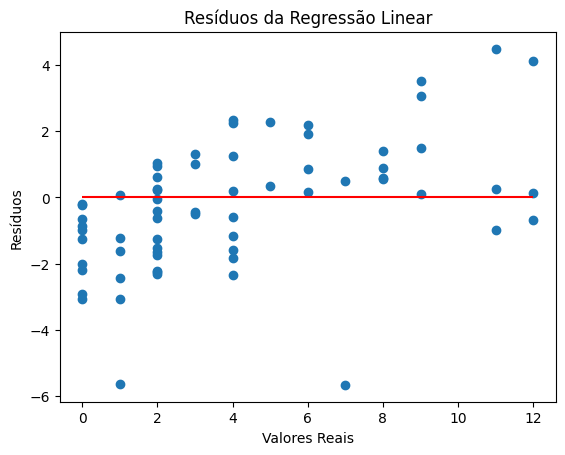

In [30]:
plt.scatter(y_test, y_test - y_pred_linear)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.title('Resíduos da Regressão Linear')
plt.show()

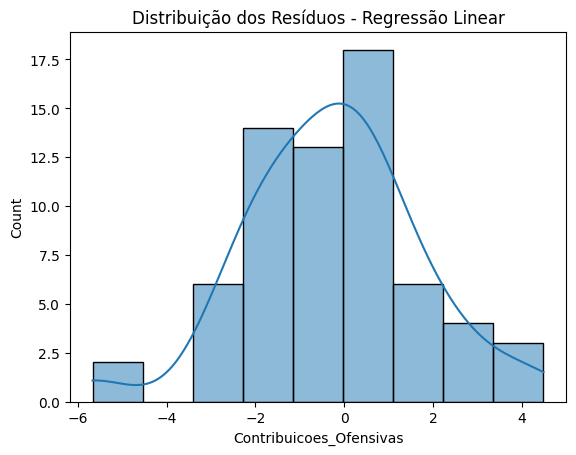

In [31]:
sns.histplot(y_test - y_pred_linear, kde=True)
plt.title('Distribuição dos Resíduos - Regressão Linear')
plt.show()

2. Criar modelos de classificação para (Meias Ofensivos)

In [32]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(meia_ofensivo[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
meia_ofensivo['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(meia_ofensivo[['xG','xAG','G-PK','Assistencias','Key_Pass','Dribles_certos','Passing 1/3','Cluster']])

      xG  xAG  G-PK  Assistencias  Key_Pass  Dribles_certos  Passing 1/3  \
0    3.1  2.2     4             1        20              15           27   
4    3.7  4.1     0             4        45              29           48   
5    1.5  1.8     1             0        14               9           36   
7    3.5  1.4     2             1        15              19          109   
8    1.6  2.4     1             3        36              11          129   
..   ...  ...   ...           ...       ...             ...          ...   
715  0.3  0.4     0             0         8               9           29   
717  3.5  3.4     5             5        37              37           79   
720  2.4  1.6     1             0        19              12           15   
725  0.2  0.5     0             1         7               4           32   
729  3.8  1.0     5             1        25               4           70   

     Cluster  
0          1  
4          0  
5          4  
7          0  
8          0

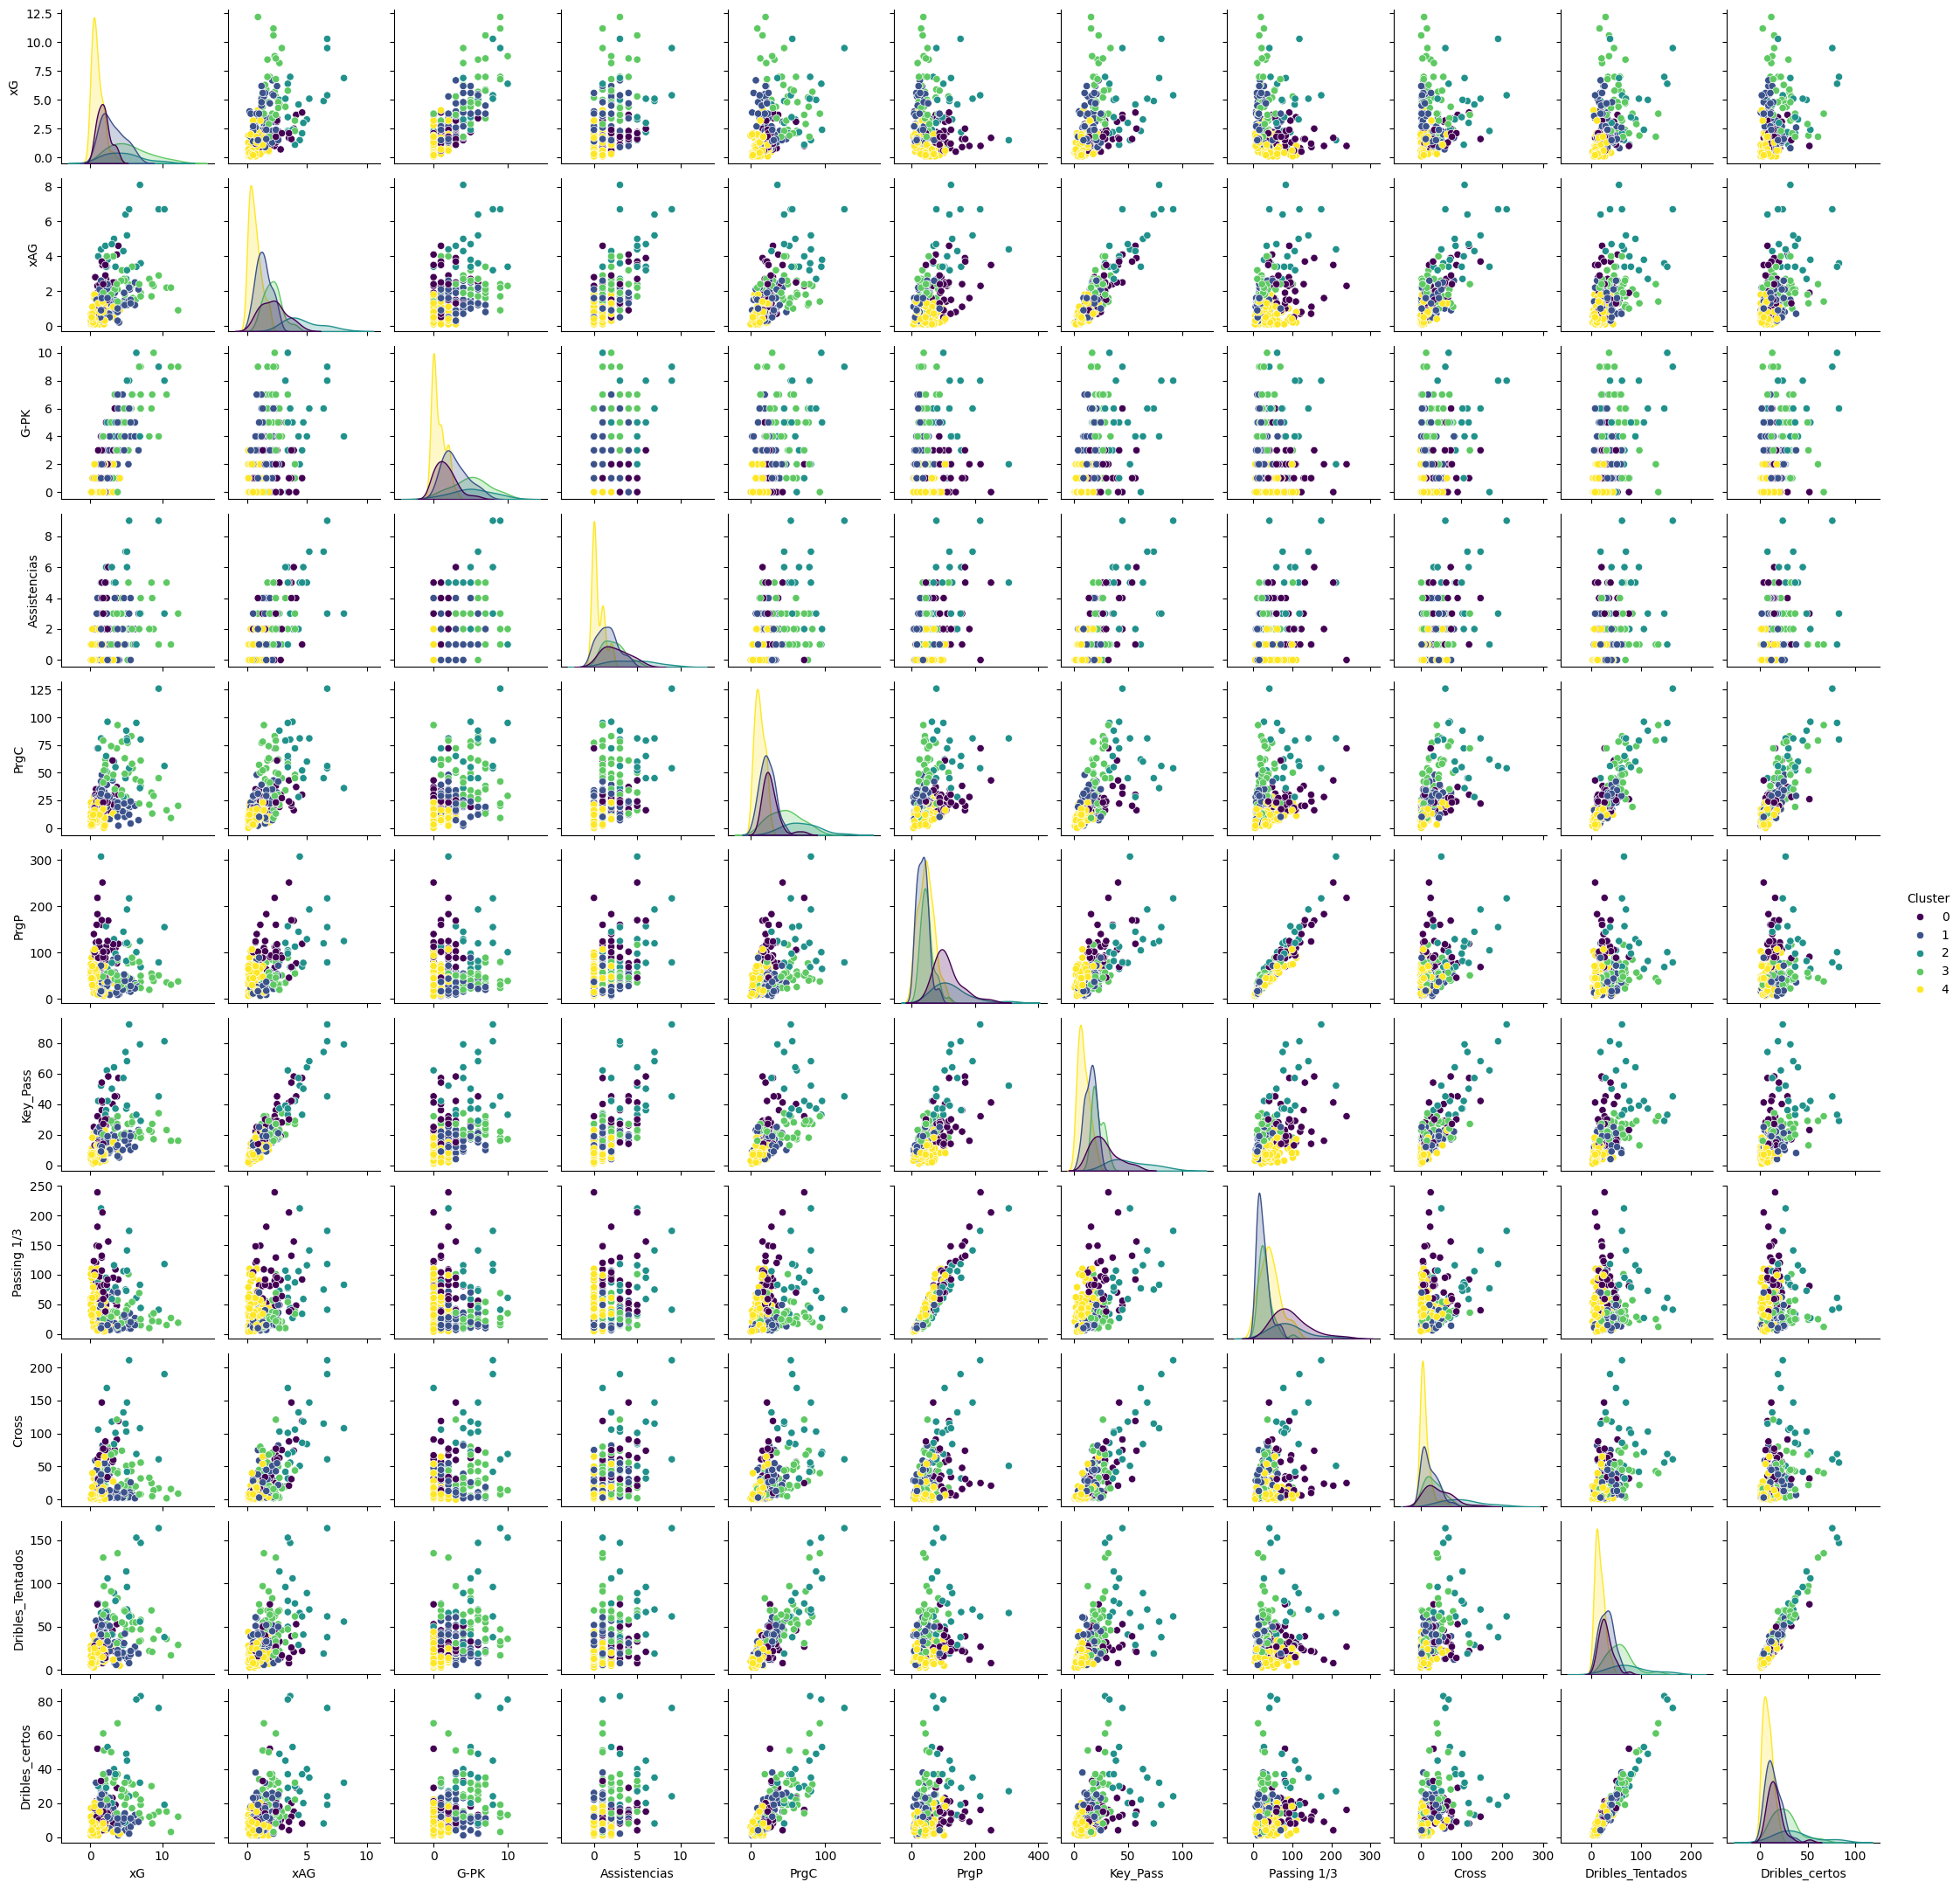

In [33]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(meia_ofensivo[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()

In [34]:
# Estatísticas médias por cluster
cluster_stats = meia_ofensivo.groupby('Cluster')[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos',]].mean()
cluster_stats['Jogadores'] = meia_ofensivo['Cluster'].value_counts()
print(cluster_stats)


               xG       xAG      G-PK  Assistencias       PrgC        PrgP  \
Cluster                                                                      
0        1.856757  2.172973  1.594595      2.513514  26.918919  112.918919   
1        3.085455  1.365455  2.909091      1.545455  22.327273   35.272727   
2            4.58     4.685      5.15           4.5       67.8      126.45   
3        5.371795  2.128205  5.025641      2.282051  46.435897   49.307692   
4        1.008824  0.652941  0.720588      0.470588  12.058824   46.514706   

          Key_Pass  Passing 1/3      Cross  Dribles_Tentados  Dribles_certos  \
Cluster                                                                        
0        27.918919    96.756757  44.216216         28.972973       15.567568   
1        15.309091    23.563636       22.6         30.709091       13.781818   
2             52.6        90.45     102.65              79.3            38.0   
3        22.307692     30.25641  33.564103           

# Nomes dos Clusters

## Cluster 0: Criadores Consistentes
- **Características principais**:
  - Assistências altas (2.51) e boa contribuição em xAG (2.17).
  - Bastante envolvimento em passes progressivos (`PrgC` e `PrgP`) e passes-chave (`Key_Pass`).
  - Moderada tentativa de dribles (28.97) com taxa de sucesso de cerca de 54%.
- **Descrição**: Jogadores equilibrados, bons em criar chances e contribuir com passes progressivos e assistências.
- **Nome sugerido**: *Criadores Consistentes* ou *Playmakers Ofensivos*.

---

## Cluster 1: Finalizadores de Apoio
- **Características principais**:
  - Alta média de gols (`G-PK`: 2.90) com xG consistente (3.08).
  - Baixa média de assistências (1.54) e passes progressivos (22.32 e 35.27).
  - Contribuição moderada em dribles (30.70 tentados) com taxa de sucesso de cerca de 45%.
- **Descrição**: Jogadores focados mais em finalização do que em criação, mas ainda contribuem moderadamente em apoio.
- **Nome sugerido**: *Finalizadores de Apoio* ou *Atacantes Complementares*.

---

## Cluster 2: Superstars Ofensivos
- **Características principais**:
  - Altíssimas métricas ofensivas:
    - G-PK: 5.15
    - Assistências: 4.5
    - xG: 4.58 e xAG: 4.68.
  - Envolvimento excepcional em passes e progressões:
    - PrgC: 67.8 e PrgP: 126.45.
    - Key_Pass: 52.6.
  - Excelentes contribuições em dribles (79.3 tentados com 38.0 certos, ~48% de sucesso).
- **Descrição**: Jogadores completos que são dominantes em todas as métricas ofensivas.
- **Nome sugerido**: *Superstars Ofensivos* ou *Destaques Completos*.

---

## Cluster 3: Dribladores e Criadores Moderados
- **Características principais**:
  - Alta contribuição em dribles (57 tentados, com 26 certos, ~45% de sucesso).
  - Bons números em xG (5.37) e G-PK (5.03), mas menor em assistências (2.28) comparado ao Cluster 2.
  - Contribuição moderada em passes progressivos e Key_Pass.
- **Descrição**: Jogadores que se destacam em dribles e criação, mas não são tão completos quanto o Cluster 2.
- **Nome sugerido**: *Dribladores Criativos* ou *Criadores Moderados*.

---

## Cluster 4: Contribuintes Limitados
- **Características principais**:
  - Baixos números em todas as métricas ofensivas:
    - G-PK: 0.72, Assistências: 0.47, xG: 1.01, xAG: 0.65.
  - Baixa contribuição em passes e dribles.
  - Jogadores com menor impacto ofensivo geral.
- **Descrição**: Jogadores que contribuem menos ofensivamente, talvez devido a papéis táticos ou tempo de jogo limitado.
- **Nome sugerido**: *Contribuintes Limitados* ou *Jogadores de Suporte*.


In [35]:
cluster_names = {
    0: 'Criadores Consistentes',
    1: 'Finalizadores de Apoio',
    2: 'Superstars Ofensivos',
    3: 'Dribladores Criativos',
    4: 'Contribuintes Limitados'
}

# Adicionar nomes ao DataFrame
meia_ofensivo['Perfil'] = meia_ofensivo['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(meia_ofensivo[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos','Perfil']].head())

    xG  xAG  G-PK  Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  \
0  3.1  2.2     4             1    43    52        20           27     29   
4  3.7  4.1     0             4    37    77        45           48     91   
5  1.5  1.8     1             0    14    55        14           36     27   
7  3.5  1.4     2             1    16   110        15          109      7   
8  1.6  2.4     1             3    38   160        36          129     48   

   Dribles_Tentados  Dribles_certos                   Perfil  
0                41              15   Finalizadores de Apoio  
4                53              29   Criadores Consistentes  
5                23               9  Contribuintes Limitados  
7                32              19   Criadores Consistentes  
8                23              11   Criadores Consistentes  


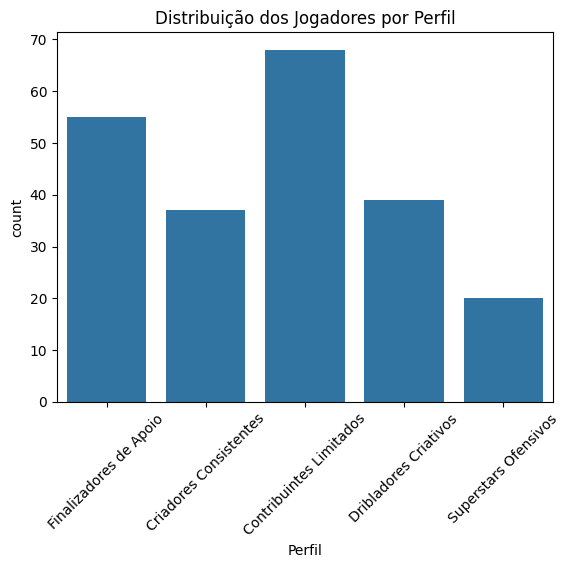

In [36]:
sns.countplot(data=meia_ofensivo, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()

In [38]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos','xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "Superstars Ofensivos"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)


Jogadores no perfil: Superstars Ofensivos
                  jogador            time posicao  Minutos    xG  xAG  G-PK  Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  Dribles_certos
32             Alejo Cruz  Atl Goianiense   FW,MF     1935   2.3  3.4     0             1    62   105        62           77    169                50              22
112  Cauly Oliveira Souza           Bahia   MF,FW     2476   3.3  5.0     4             5    60   129        64          116     84                89              40
116       Everton Ribeiro           Bahia      MF     2505   1.5  4.4     2             5    81   307        52          212     51                66              27
154    Jefferson Savarino   Botafogo (RJ)   MF,FW     1862   4.9  6.4     6             7    45   120        74           75    115                19               8
160         Luiz Henrique   Botafogo (RJ)   FW,MF     2380   7.0  3.6     6             3    80    69        29           44   

In [44]:
# Dicionário dos peso para cada métrica
pesos = {
    'xG': 1.1,
    'xAG': 1.85,
    'G-PK': 1.80,
    'Assistencias': 2,
    'Acoes Ofensivas': 1.2,
    'Key_Pass': 1.5,
    'Passing 1/3': 1.1,
    'Cross': 1.0,
    '%Dribles': 1.25
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    # Verifica se a coluna é numérica antes de normalizar
    if pd.api.types.is_numeric_dtype(coluna):
        return coluna / coluna.max()
    else:
        # Se a coluna não for numérica, converte para numérica
        # (ignorando erros para valores não numéricos)
        return pd.to_numeric(coluna, errors='coerce') / pd.to_numeric(coluna, errors='coerce').max()

# Normalizando 'Acoes Ofensivas' e 'Aerial Duel%'
meia_ofensivo['Acoes Ofensivas'] = normalizar(meia_ofensivo['Acoes Ofensivas']) * 100
meia_ofensivo['%Dribles'] = normalizar(meia_ofensivo['%Dribles']) * 100

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    meia_ofensivo[coluna + '_Pontuacao'] = meia_ofensivo[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
meia_ofensivo['Pontuacao_Total'] = meia_ofensivo[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = meia_ofensivo['Pontuacao_Total'].min()
max_pontuacao = meia_ofensivo['Pontuacao_Total'].max()
meia_ofensivo['Pontuacao'] = (
    (meia_ofensivo['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'Dribladores Criativos'
jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: Dribladores Criativos
 Ranking                time posicao          jogador                Perfil  Pontuacao
       1 Red Bull Bragantino   FW,MF          Vitinho Dribladores Criativos  36.947814
       2               Bahia      MF       Jean Lucas Dribladores Criativos  33.061916
       3           Juventude      FW    Lucas Barbosa Dribladores Criativos  32.412204
       4           São Paulo   FW,MF         Ferreira Dribladores Criativos  28.212984
       5            Criciúma      MF      Matheusinho Dribladores Criativos  28.212147
       6              Cuiabá   FW,MF          Clayson Dribladores Criativos  28.168495
       7 Red Bull Bragantino   FW,MF          Helinho Dribladores Criativos  27.396326
       8    Atlético Mineiro   FW,MF         Paulinho Dribladores Criativos  26.583013
       9           Fortaleza      FW            Breno Dribladores Criativos  26.561155
      10      Atl Goianiense   FW,MF    Luiz Fernando Dribladores Criativos